<a href="https://colab.research.google.com/github/juliogdomingues/icd_ufmg/blob/main/Lista%20aberta%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intervalos de Confiança

Neste notebook, vamos aprender a calcular intervalos de confiança.

## Uma breve introdução

Embora intervalos de confiança sejam amplamente usados, pode ser difícil entender seu conceito e quando devemos usá-lo. Então vamos a um exemplo:

Suponha que você queira saber qual a porcentagem de pessoas nos Brasil que amam futebol. Para obter uma resposta 100% correta a essa pergunta, você deveria perguntar a cada um dos 212 milhões habitantes se eles amam ou não futebol. Obviamente, não é viável falar com 212 milhões de pessoas.

Você poderia então obter uma amostra aleatória de brasileiros (falando com muito menos pessoas) para obter a porcentagem de pessoas que amam futebol nessa amostra. Contudo, assim não estaria 100% confiante de que esse número está certo ou quão longe esse número está da resposta real.

Você poderia tentar obter um intervalo, como: “Tenho 95% de certeza que a porcentagem de pessoas que amam futebol nos EUA está entre 58% e 62%”. É daí que vem o nome Intervalo de confiança, temos um intervalo e temos alguma confiança sobre ele.

## Como calcular intervalos de confiança

O cálculo do intervalo de confiança (ou CI, Confidence Interval) envolve a melhor estimativa obtida pela amostra (média ou mediana) e uma margem de erro. A margem de erro é calculada usando o Z-score para a confiança desejada multiplicada pelo desvio padrão amostral da média.


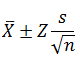




Em que image.png é a média amostral, Z é o valor de Z-score associado ao nível de confiança desejado, e image.png é o desvio padrão amostral da média.

Aqui estão os z-scores para os níveis de confiança mais comuns:

Confiança | Z

75%       | 1.15

90%       | 1.64

95%       | 1.96

99%       | 2.57

## Vamos ao código!

In [1]:
import pandas as pd
import numpy as np

## Base de dados
Para este exercício, vamos utilizar uma base de dados do site [basedosdados.org](https://basedosdados.org), uma organização colaborativa que cataloga e divulga dados públicos brasileiros. Vocês podem usar esse site para buscar bases para projetos acadêmicos, sempre que necessitarem. Outro exemplo de site de reúne bases abertas (nesse caso, americanas) é o [UCI](https://archive.ics.uci.edu/ml/index.php).

Vamos usar a base de "Indicadores de Mobilidade e Transportes em 2010" para analisar os dados sobre tempo médio de deslocamento casa-trabalho para o ano de 2010.

Para usar o arquivo, podemos usar duas opções: (1)  baixar o csv e importá-lo (usando pandas), ou (2) usar diretamente o pacote do basededados.

### Opção 1:
Baixar a tabela 'tempo_deslocamento_casa_trabalho' em https://basedosdados.org/dataset/br-mobilidados-indicadores, adicionar em Files (menu da esquerda) e importar com pandas

In [2]:
df = pd.read_csv("/content/tempo_deslocamento_casa_trabalho.csv")

### Opção 2:
Instalar o pacote basedosdados, e importar a base diretamente. Mais detalhes em: https://basedosdados.github.io/mais/access_data_packages/#primeiros-passos.

Vocês terão que criar um projeto em https://console.cloud.google.com/projectselector2/home/dashboard?pli=1 para pegar o billing_project_id (ID do projeto)

In [3]:
!pip install basedosdados
import basedosdados as bd
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_mobilidados_indicadores',
            table_id='tempo_deslocamento_casa_trabalho',\
            # billing_project_id=<ID_PROJETO>)#colocar aqui o ID do projeto do gcloud
            billing_project_id='censo-331617')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
df

Antes de começarmos a análise, é importante explorar se há valores faltantes.

In [ ]:
df['tempo_medio_deslocamento'].isnull().sum()

Não há valores faltantes.

### Vamos calcular o intervalo de confiança para o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.

In [3]:
## Primeiro, vamos calcular a media e o o desvio padrao
media_mg = np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])
std_mg = np.std(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'])

print('O tempo médio de deslocamento no estado de MG é de', \
      np.round(media_mg,2), 'e o desvio padrão é de', np.round(std_mg,2))

O tempo médio de deslocamento no estado de MG é de 33.95 e o desvio padrão é de 10.49


In [4]:
## Agora, voltando à tabela do Z-score, vemos que o valor de Z
##correspondente a um nível de confiança de 95% é de 1.96
## Assim, podemos calcular o intervalo de confiança:

z = 1.96
CI_inf_mg = media_mg - z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg = media_mg + z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))

In [5]:
print('(', np.round(CI_inf_mg,2), ',',np.round(CI_sup_mg,2), ')')

( 30.61 , 37.28 )


## Exercício 1

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de MG, considerando um nível de confiança de 90%?

In [6]:
z = 1.65
CI_inf_mg = media_mg - z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
CI_sup_mg = media_mg + z*(std_mg/np.sqrt(len(df.loc[df['sigla_uf']=='MG'])))
print('(', np.round(CI_inf_mg,2), ',',np.round(CI_sup_mg,2), ')')

( 31.14 , 36.76 )


## Exercício 2

Qual é o CI do tempo médio de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [7]:
media_sp = np.mean(df.loc[df['sigla_uf']=='SP','tempo_medio_deslocamento'])
std_sp = np.std(df.loc[df['sigla_uf']=='SP','tempo_medio_deslocamento'])

z = 1.96
CI_inf_sp = media_sp - z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='SP'])))
CI_sup_sp = media_sp + z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='SP'])))
print('(', np.round(CI_inf_sp,2), ',',np.round(CI_sup_sp,2), ')')

( 41.9 , 47.13 )


## Exercício 3

Qual é o CI do tempo **mediano** de deslocamento casa-trabalho para o estado de SP, considerando um nível de confiança de 95%?

In [8]:
mediana_sp = np.median(df.loc[df['sigla_uf']=='SP','tempo_medio_deslocamento'])

z = 1.96
CI_inf_sp = mediana_sp - z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='SP'])))
CI_sup_sp = mediana_sp + z*(std_sp/np.sqrt(len(df.loc[df['sigla_uf']=='SP'])))
print('(', np.round(CI_inf_sp,2), ',',np.round(CI_sup_sp,2), ')')

( 42.39 , 47.61 )


### Biblioteca scipy.stats

O módulo de funções estatísticas scipy stats nos permite calcular o CI chamando apenas uma função. Para maiores informações, ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

In [9]:
import scipy.stats as st

#Voltando ao problema inicial, vamos calcular o intervalo de confiança para
#o tempo medio de deslocamento no estado de MG para um nível de confiança de 95%.
#alpha = nivel de confiança
#loc = array dos dados para media
#scale = desvio padrão amostral da média

ci = st.norm.interval(confidence=0.95, loc=np.mean(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento']), \
                      scale=st.sem(df.loc[df['sigla_uf']=='MG','tempo_medio_deslocamento'], \
                                   ddof=0, nan_policy='omit'))

In [10]:
np.round(ci,2)

array([30.61, 37.28])

## Exercício 4

Usando a biblioteca scipy.stats, calcule e imprima o CI do tempo médio de deslocamento para cada estado brasileiro, com nível de confiança de 99% .

In [11]:
conf = 0.99

def calcular_ci(df, tratar_erros=False):
    resultados = []
    for estado in sorted(df['sigla_uf'].unique()):
        estado_data = df.loc[df['sigla_uf'] == estado, 'tempo_medio_deslocamento'].dropna()
        n_samples = len(estado_data)
        std_dev = np.std(estado_data)

        if n_samples > 1 and std_dev > 0:  # Checando se há mais de um dado e variância não zero
            mean = np.mean(estado_data)
            ci = st.norm.interval(confidence=conf, loc=mean, scale=st.sem(estado_data))
            if tratar_erros:
                resultados.append((estado, mean, ci, n_samples, std_dev))
            else:
                resultados.append((estado, mean, ci))
        else:
            if tratar_erros:
                resultados.append((estado, None, (None, None), n_samples, std_dev))
            else:
                resultados.append((estado, np.nan, (np.nan, np.nan)))

    return resultados

In [12]:
# Para imprimir:
for estado, mean, ci in calcular_ci(df):
    print(f"{estado}: {np.round(ci, 2)}")

AC: [nan nan]
AL: [nan nan]
AM: [nan nan]
AP: [nan nan]
BA: [27.4  35.21]
CE: [22.16 29.11]
DF: [nan nan]
ES: [nan nan]
GO: [24.03 36.23]
MA: [nan nan]
MG: [29.5  38.39]
MS: [nan nan]
MT: [nan nan]
PA: [25.42 40.58]
PB: [nan nan]
PE: [34.14 43.99]
PI: [nan nan]
PR: [29.13 38.05]
RJ: [39.7  51.63]
RN: [nan nan]
RO: [nan nan]
RR: [nan nan]
RS: [nan nan]
SC: [nan nan]
SE: [nan nan]
SP: [41.03 47.99]
TO: [nan nan]


## Exercício 5
Se não há valores valores, por que a função retorna NA para alguns estados?

In [13]:
for estado, mean, ci, n_samples, std_dev in calcular_ci(df, tratar_erros=True):
    if mean is not None:
        print(f"{estado}: {np.round(ci, 2)}")
    else:
        print(f"{estado}: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: {n_samples}, Variância: {std_dev})")

AC: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
AL: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
AM: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
AP: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
BA: [27.4  35.21]
CE: [22.16 29.11]
DF: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
ES: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
GO: [24.03 36.23]
MA: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
MG: [29.5  38.39]
MS: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
MT: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
PA: [25.42 40.58]
PB: Insuficiente ou sem dados para calcular o CI (Dados disponíveis: 1, Variância: 0.0)
PE: [34.14 43.99]
PI: Insufici

Supondo que a pergunta era "Se não há valores NULOS, por que a função retorna NA para alguns estados?"

Como pode ser visto na saída acima, isso ocorre pois em alguns estados temos poucos dados (apenas 1), faendo com que a variância, e, por consequência, o desvio padrão, sejam 0. Para calcular um intervalo de confiança, são necessários pelo menos dois dados para que o desvio padrão seja definido (n > 1).

## Exercício 6

Crie uma visualização (a seu critério) para mostrar os intervalos de confiança dos estados com valores não nulos. Qual padrão você observa?

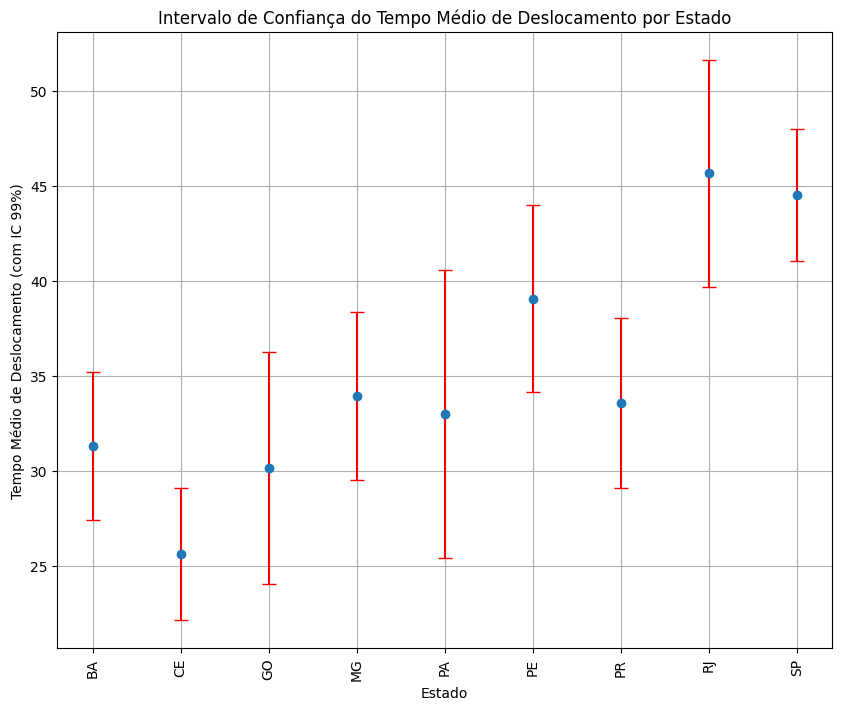

In [14]:
import matplotlib.pyplot as plt

estados = []
means = []
errors = []

for estado, mean, ci in calcular_ci(df):
    if mean is not None and not np.isnan(mean):  # Checa se a média não é NaN
        lower, upper = ci
        estados.append(estado)
        means.append(mean)
        errors.append((mean - lower, upper - mean))

# Plot
plt.figure(figsize=(10, 8))
plt.errorbar(x=estados, y=means, yerr=np.array(errors).T, fmt='o', ecolor='r', capsize=5)
plt.xlabel('Estado')
plt.ylabel('Tempo Médio de Deslocamento (com IC 99%)')
plt.title('Intervalo de Confiança do Tempo Médio de Deslocamento por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Podemos perceber que estados com grandes centros urbanos e tráfego pesado, como São Paulo (SP) e Rio de Janeiro (RJ), podem apresentar tempos médios de deslocamento maiores. Tal padrão é estatisticamente significativo na comparação com alguns outros estados, como Paraná (PR) e Ceará (CE).
Além disso, estados com maior número de respostas tendem a ter intervalos de confiança mais estreitos, refletindo maior precisão nas estimativas do tempo de deslocamento.